# News Sentiment Classification Using Naive Bayes

##### 𝐁𝐚𝐲𝐞𝐬 𝐓𝐡𝐞𝐨𝐫𝐞𝐦  is just a probablity theorem the statement that  is :
###### P = probablity
###### P(a/b) = probablity of 'a' when 'b' has occured.
𝑝(𝐴|𝐵)⋅𝑝(𝐵)=𝑝(𝐵|𝐴)⋅𝑝(𝐴)

## Importing required libraries 

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import joblib


import warnings
warnings.filterwarnings('ignore')


C:\Users\hp\anaconda3\lib\site-packages\pandas\compat\__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# #  Loading the dataset into df

In [2]:
#importing the training datafile

df=pd.read_csv(r'stock_data.csv')
print(df.shape)
df.head(10)

(5791, 2)


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
5,PGNX Over 3.04,1
6,AAP - user if so then the current downtrend wi...,-1
7,Monday's relative weakness. NYX WIN TIE TAP IC...,-1
8,GOOG - ower trend line channel test & volume s...,1
9,AAP will watch tomorrow for ONG entry.,1


## Objects of stocks_dataset

In [3]:

dir(df)

['Sentiment',
 'T',
 'Text',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__r

## Bar Graph representation of our data

<AxesSubplot:>

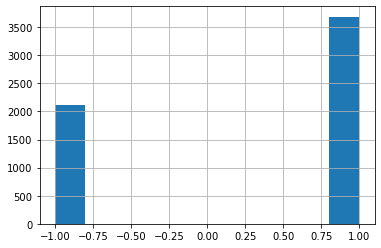

In [4]:
df["Sentiment"].hist()

In [5]:
#sentiment count
df['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

## Tokenizing the headline of news and setting stop words of english

In [6]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')


## List of stop words

In [7]:
print(stopword_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Performing text cleaning on our headlines

### Removing the square brackets

In [8]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

### Removing the noisy text

In [9]:
def denoise_text(text):
    text = remove_between_square_brackets(text)
    return text

### Applyte  function on Text column / headlines

In [10]:
df['Text']=df['Text'].apply(denoise_text)

## Define function for removing special characters

In [11]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

## #Apply function on review column

In [12]:
df['Text']=df['Text'].apply(remove_special_characters)

## Dataset after text cleaning

In [13]:
df

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user AAP MOVIE 55 return for the FEAGEED indic...,1
2,user Id be afraid to short AMZN they are look...,1
3,MNTA Over 1200,1
4,OI Over 2137,1
...,...,...
5786,Industry body CII said discoms are likely to s...,-1
5787,Gold prices slip below Rs 46000 as investors b...,-1
5788,Workers at Bajaj Auto have agreed to a 10 wage...,1
5789,Sharemarket LIVE Sensex off days high up 600 p...,1


## Removing the stopwords

In [14]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

### Apply function on Sentiment column

In [15]:
df['Text']=df['Text'].apply(remove_stopwords)

## Split into training and testing data

### Test size = 30% and Random state is at 42

In [16]:
x_Train = df['Text']
y_Train = df['Sentiment']
x_Train, x_test, y_Train, y_test = train_test_split(x_Train,y_Train, stratify=y_Train, test_size=0.30, random_state=42)

## Vectorizing  headlines text  to numbers

In [17]:
vec = CountVectorizer(stop_words='english')
x_Train = vec.fit_transform(x_Train).toarray()
x_test = vec.transform(x_test).toarray()

###### The Naive Bayes Classifier is an algorithm that encodes this simple reasoning process mathematically. It is based on two important pieces of information that we can learn from the training set:
######  The probabilities that a randomly chosen review will be positive, or negative
###### How likely is it that a given token would appear in a positive or negative review
###### This is all the information we need to build a model capable of predicting fairly accurately how any given review will be classified, given its text!¶

## Using multinomial naive bayes on our data

In [18]:
model = MultinomialNB()
model.fit(x_Train, y_Train)

MultinomialNB()

###### Applying  𝐁𝐚𝐲𝐞𝐬 𝐓𝐡𝐞𝐨𝐫𝐞𝐦  to our Headline sentiment problem:

###### We identify  𝐴  and  𝐵  as
###### 𝐴 = class , i.e. positive or negative, and
###### 𝐵 = tokens , wordof text

###### Then  𝐁𝐚𝐲𝐞𝐬 𝐓𝐡𝐞𝐨𝐫𝐞𝐦  says

###### 𝑝(class|tokens)⋅𝑝(tokens)=𝑝(tokens|class)⋅𝑝(class) 
###### so that
###### 𝑝(class|tokens)=𝑝(tokens|class)⋅𝑝(class)𝑝(tokens) 
###### Since  𝑝(tokens)  is a constant, we have the proportionality

###### 𝑝(class|tokens)∝𝑝(tokens|class)⋅𝑝(class) 
###### The left hand side of the above expression is called the  𝐩𝐨𝐬𝐭𝐞𝐫𝐢𝐨𝐫 𝐜𝐥𝐚𝐬𝐬 𝐩𝐫𝐨𝐛𝐚𝐛𝐢𝐥𝐢𝐭𝐲 , the probability that the review is positive (or negative), given the tokens it contains. This is exactly what we want to predict!

## Accuracy of model is at 77%

In [19]:
model.score(x_test, y_test)

0.7756041426927502

###### Naive Bayes classifier is a collection of many algorithms where all the algorithms share one common principle, and that is each feature being classified is not related to any other feature.

### Accuracy can be further increased by using larger dataset, more exclusive (words/tokens), analysing tokens more deeply.